<a href="https://colab.research.google.com/github/MrPotato-00/cat_dog_classifier/blob/main/cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# importing the dataset from kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 22.2MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.2MB/s]


In [ ]:
# unzipping the file
'''
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()
'''

!unzip '/content/dogs-vs-cats.zip'

In [ ]:
# training the dataset

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range =0.2,
    zoom_range =0.2,
    horizontal_flip = True
)

train_set = train_datagen.flow_from_directory(
    'train',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [ ]:
# test set

test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_set=test_datagen.flow_from_directory(
    'test',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)


Found 5000 images belonging to 2 classes.


In [ ]:
# initialising the CNN

model = tf.keras.models.Sequential()



In [ ]:
# creating the multi layer convulation layer

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=[256,256,3]))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
# flatten the convulation layer

model.add(tf.keras.layers.Flatten())

In [ ]:
# full connection

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
#model.add(tf.keras.layers.Dense(units=, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))

In [ ]:
# output layer

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# compilation

model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
# training the train set

history = model.fit(x=train_set, validation_data = test_set, epochs=15)

Epoch 1/15
625/625 [==============================] - 365s 568ms/step - loss: 1.3396 - accuracy: 0.5786 - val_loss: 0.6548 - val_accuracy: 0.5992
Epoch 2/15
625/625 [==============================] - 331s 529ms/step - loss: 0.6404 - accuracy: 0.6322 - val_loss: 0.6216 - val_accuracy: 0.6968
Epoch 3/15
625/625 [==============================] - 325s 520ms/step - loss: 0.6028 - accuracy: 0.6718 - val_loss: 0.5526 - val_accuracy: 0.7194
Epoch 4/15
625/625 [==============================] - 320s 513ms/step - loss: 0.5331 - accuracy: 0.7296 - val_loss: 0.5197 - val_accuracy: 0.7540
Epoch 5/15
625/625 [==============================] - 329s 526ms/step - loss: 0.4951 - accuracy: 0.7540 - val_loss: 0.5720 - val_accuracy: 0.7542
Epoch 6/15
625/625 [==============================] - 319s 510ms/step - loss: 0.4582 - accuracy: 0.7824 - val_loss: 0.4825 - val_accuracy: 0.7768
Epoch 7/15
625/625 [==============================] - 319s 510ms/step - loss: 0.4205 - accuracy: 0.8047 - val_loss: 0.4501 -

In [ ]:
# this was done to solely check which part of history keyword produces the plot
classify_img =history

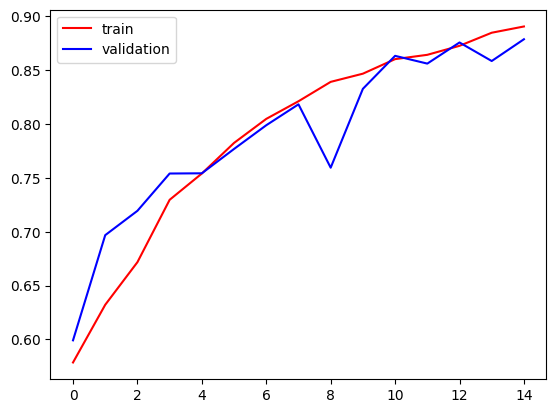

In [ ]:
# plotting the accuracy plot

plt.plot(classify_img.history['accuracy'], color='red' ,label= 'train')
plt.plot(classify_img.history['val_accuracy'], color ='blue', label ='validation')
plt.legend()
plt.show()

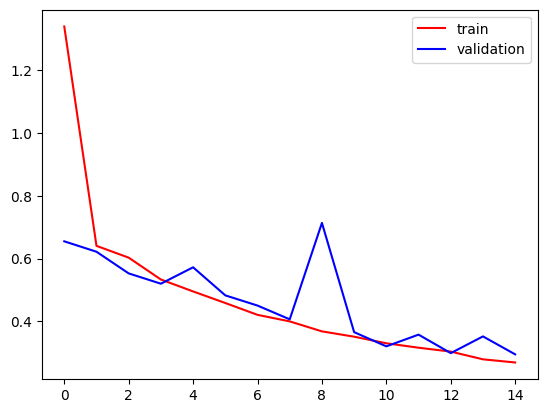

In [ ]:
# plotting the loss plot

plt.plot(history.history['loss'], color= 'red', label= 'train')
plt.plot(history.history['val_loss'], color ='blue' ,label ='validation')
plt.legend()
plt.show()

In [ ]:
# predicting

from keras.preprocessing import image
test_image = image.load_img('dog2.jpg', target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_set.class_indices
if result[0][0] ==1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 19ms/step


In [ ]:
print(prediction)

dog


In [ ]:
model.save("/content/cat_dog_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
